In [1]:
# Setting
## The path & packages
'upload'
#### Draft um Gitupload
!git init 
!git add . 
!git commit -m "3.3.2 Mann U Test for Univariate Analysis"
!git push

Reinitialized existing Git repository in C:/Users/heuse/Desktop/SE_Risk_Management-1/.git/
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date


In [3]:
#Comment out the other paths and comment in your path
path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
#path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
#path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [4]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)


checking the data

In [5]:
df_train.head()

id  default     legal_form  zip_code  sector  year_inc  count_emp  \
0  C_405        0  GmbH & Co. KG     12359   46730      1900        NaN   
1  C_292        0  GmbH & Co. KG     10719   70101      1976        NaN   
2  C_746        0           GmbH     13353   87100      1962      323.0   
3  C_838        0             AG     12529   68320      1972        1.0   
4  C_495        0    Einzelfirma     12165   47730      1908        NaN   

  type_pl         sales  gross_performance  ...  bonds_payables_lt  \
0     GKV  1.068738e+08       1.068738e+08  ...                NaN   
1     GKV  1.393869e+06       1.407889e+06  ...                NaN   
2     GKV  3.864034e+06       7.597353e+05  ...                NaN   
3     GKV  4.384786e+06       4.405058e+06  ...                NaN   
4     GKV  1.104478e+08       1.104478e+08  ...                NaN   

   total_equity  current_assets  monetary_current_assets         cash  \
0  3.224471e+07     37831990.81              17111465.66  10297047.50   
1  4.508026e+06      4669178.63                927837.74    926383.75   
2  5.164048e+04     28101189.79              11116958.92   9146283.79   
3  1.182011e+07      8238473.86               7519183.22   6890565.23   
4  4.547445e+08     35465651.58               8545183.94   5036615.09   

   trade_receivables_st  trade_receivables_lt  cf_operating  cf_investment  \
0                   NaN                   NaN  6.986094e+06  -1.112342e+06   
1                   NaN                   NaN -4.343980e+06   1.174427e+06   
2             617816.28                   NaN  9.548544e+06  -7.536444e+06   
3             319848.26                   NaN  1.715799e+06  -6.561222e+05   
4             516646.73                   NaN  1.301809e+08  -1.419776e+08   

   cf_financing  
0   -7520392.09  
1    1128108.08  
2     -22026.07  
3    -169655.66  
4   12567030.80  

[5 rows x 40 columns]

In [6]:
df_test.head(8)

legal_form  zip_code  sector  year_inc  count_emp type_pl        sales  \
id                                                                             
C_411       GmbH     14089   69204      1986        NaN     GKV    728946.68   
C_896       GmbH     13127   87100      1992      181.0     GKV    708847.33   
C_252       GmbH     14059   86101      1993      505.0     GKV  26025323.61   
C_165       GmbH     10437   87100      1995       82.0     GKV   1105332.48   
C_856       GmbH     14943   96090      2002       22.0     GKV  51995424.22   
C_415       GmbH     10969   68321      2006        NaN     GKV  13597456.35   
C_520       GmbH     10625   68100      2010        NaN     GKV  10365544.05   
C_127       GmbH     29308   87100      2007        NaN     GKV  10129943.12   

       gross_performance  gross_profit  earn_from_op  ...  bonds_payables_lt  \
id                                                    ...                      
C_411          728946.68     209721.36      45390.50  ...                NaN   
C_896          708847.33     738495.17      13017.29  ...                NaN   
C_252        26015542.03   22022993.85    2086104.36  ...                NaN   
C_165         1105332.48     717405.05      88074.80  ...                NaN   
C_856        51979901.95   46420844.34    5956777.13  ...                NaN   
C_415        13597456.35    7667501.25    -109859.68  ...                NaN   
C_520        10365544.05    7931366.20     565338.94  ...                NaN   
C_127        10486827.90    5959584.15     435328.26  ...                NaN   

       total_equity  current_assets  monetary_current_assets        cash  \
id                                                                         
C_411           NaN        64195.98                 28659.19     5598.17   
C_896     442875.57       479144.25                452033.96   442835.62   
C_252   13733666.50     14504753.93               3441491.02   322075.13   
C_165     381990.95       371506.04                343269.12   256395.19   
C_856    6828494.53     18909648.90              15619860.60  6720068.91   
C_415          0.00      1273354.65               1277275.04     5848.43   
C_520    8823433.07      7715921.82               7749440.79  6802934.01   
C_127    1990015.77      3451499.64               1352994.01     1349.09   

       trade_receivables_st  trade_receivables_lt  cf_operating  \
id                                                                
C_411                   NaN                   NaN      52632.64   
C_896                   NaN                   NaN     -10575.21   
C_252            3034766.29                   NaN    2862349.65   
C_165                   NaN                   NaN     156251.71   
C_856            8847966.22                   NaN    5696079.15   
C_415             136628.62                   NaN      83600.84   
C_520             855343.08                   NaN    1051697.31   
C_127             986648.60                   NaN     -56012.29   

       cf_investment  cf_financing  
id                                  
C_411        -534.87 -5.457891e+04  
C_896       -1295.42 -5.820000e-11  
C_252     -667342.46 -2.091456e+06  
C_165      -57344.11 -1.160000e-10  
C_856    -1418555.39 -4.163971e+06  
C_415     1560281.10 -1.643803e+06  
C_520     -366425.37 -5.398260e+03  
C_127     -533257.11  4.586848e+05  

[8 rows x 38 columns]

# Variables

## Renaming of some colums
We decided to not rename any varialbes

## Further variable coding
Transforming variables

### Transforming year_inc to age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

In [8]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

id  default     legal_form  zip_code  sector  year_inc  count_emp  \
572  C_482        0   Freiberufler     61169   49310         0        NaN   
477  C_597        1   Freiberufler     32457   71113         0        NaN   
272  C_543        0             AG     86150   68101      1464        NaN   
249  C_105        0             AG     76185   70101      1856        NaN   
531  C_711        0  GmbH & Co. KG     42651   32501      1857       63.0   

    type_pl        sales  gross_performance  ...  total_equity  \
572     GKV    635769.95          635769.95  ...      37125.13   
477     GKV    241456.04          216900.58  ...     514698.88   
272     GKV  73165008.12        73165008.12  ...    7797900.20   
249     GKV  53372139.09        53110170.33  ...    7522638.74   
531     GKV   2713538.03         2713538.03  ...     330130.46   

     current_assets  monetary_current_assets         cash  \
572       299815.83                268452.30     49009.81   
477       639035.00                639951.26      7466.24   
272     29653971.68              11687193.17   3444440.58   
249     31608245.57              26918553.04  19531832.78   
531       625173.80                462636.78     66853.99   

     trade_receivables_st  trade_receivables_lt  cf_operating  cf_investment  \
572                   NaN                   NaN    -212829.13  -1.750000e-10   
477              24518.87                   NaN      14391.18  -7.090000e-11   
272            4254958.92                   NaN   12170860.85  -6.620784e+05   
249            6509382.04                   NaN  -10483605.89  -1.015179e+07   
531             281981.84                   NaN     133580.07  -5.635444e+04   

     cf_financing  age_num  
572  9.460000e-11     2020  
477  1.204280e+03     2020  
272 -2.560090e+05      556  
249  3.198861e+07      164  
531  3.780000e-10      163  

[5 rows x 41 columns]

As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [9]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

id  default     legal_form  zip_code  sector  year_inc  count_emp  \
272  C_543        0             AG     86150   68101      1464        NaN   
249  C_105        0             AG     76185   70101      1856        NaN   
371  C_361        0           GmbH     21335   20520      1858      185.0   
572  C_482        0   Freiberufler     61169   49310         0        NaN   
477  C_597        1   Freiberufler     32457   71113         0        NaN   
283  C_519        0           GmbH     80807   18120      1862        NaN   
531  C_711        0  GmbH & Co. KG     42651   32501      1857       63.0   
454  C_259        0   Freiberufler     44141   94110      1863      140.0   
165  C_347        0           GmbH     57072   25993      1866      116.0   
445  C_019        0             AG     33689   70109      1870      107.0   

    type_pl         sales  gross_performance  ...  total_equity  \
272     GKV  7.316501e+07       7.316501e+07  ...  7.797900e+06   
249     GKV  5.337214e+07       5.311017e+07  ...  7.522639e+06   
371     GKV  1.979305e+08       1.972723e+08  ...  2.445527e+06   
572     GKV  6.357699e+05       6.357699e+05  ...  3.712513e+04   
477     GKV  2.414560e+05       2.169006e+05  ...  5.146989e+05   
283     GKV  1.560010e+06       4.462166e+06  ...  3.912989e+05   
531     GKV  2.713538e+06       2.713538e+06  ...  3.301305e+05   
454     GKV  3.584665e+05       3.584665e+05  ...  1.871424e+05   
165     GKV  2.645000e+05       2.645000e+05  ...  1.834052e+04   
445     GKV  2.432905e+06       2.432905e+06  ... -3.640000e-12   

     current_assets  monetary_current_assets         cash  \
272     29653971.68              11687193.17   3444440.58   
249     31608245.57              26918553.04  19531832.78   
371     32809291.04              24618777.77      1012.13   
572       299815.83                268452.30     49009.81   
477       639035.00                639951.26      7466.24   
283      1780853.40                507526.40     13989.13   
531       625173.80                462636.78     66853.99   
454        70476.90                 61735.26     41618.21   
165       186602.25                172230.65      1434.82   
445       340903.37                340903.37    340903.37   

     trade_receivables_st  trade_receivables_lt  cf_operating  cf_investment  \
272            4254958.92                   NaN   12170860.85  -6.620784e+05   
249            6509382.04                   NaN  -10483605.89  -1.015179e+07   
371           24452421.93                   NaN   11658956.29  -1.072492e+06   
572                   NaN                   NaN    -212829.13  -1.750000e-10   
477              24518.87                   NaN      14391.18  -7.090000e-11   
283                   NaN                   NaN    -115009.30  -6.533309e+04   
531             281981.84                   NaN     133580.07  -5.635444e+04   
454                   NaN                   NaN      22009.92  -1.400000e+05   
165                   NaN                   NaN       1484.67   4.500000e+01   
445                   NaN                   NaN    1933900.10   0.000000e+00   

     cf_financing  age_num  
272 -2.560090e+05   157.32  
249  3.198861e+07   157.32  
371 -1.088165e+07   157.32  
572  9.460000e-11   157.32  
477  1.204280e+03   157.32  
283  2.707314e+05   157.32  
531  3.780000e-10   157.32  
454  1.307238e+05   157.00  
165  0.000000e+00   154.00  
445 -2.050780e+06   150.00  

[10 rows x 41 columns]

In [ ]:
sns.boxplot(y=df_train["age_num"]).set_title("Now a little bit better");

In [ ]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

In [10]:
df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

age_quartile  (8.999, 12.0]  (12.0, 15.0]  (15.0, 19.0]  (19.0, 22.0]  \
default                                                                 
0                        69            61            75            78   
1                         5             1             3             6   

age_quartile  (22.0, 24.0]  (24.0, 28.0]  (28.0, 31.0]  (31.0, 41.4]  \
default                                                                
0                       36            67            64            54   
1                        4             0             7             5   

age_quartile  (41.4, 65.0]  (65.0, 157.32]  
default                                     
0                       65              62  
1                        3               4

In [11]:
mdl = sm.Logit.from_formula('default ~ age_num + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: default          AIC:              295.6596
Date:               2020-12-31 15:55 BIC:              304.6712
No. Observations:   669              Log-Likelihood:   -145.83 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.72592 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -2.8762    0.2531  -11.3634  0.0000  -3.3723  -2.3801
age_num     0.0019    0.0054    0.3576  0.7206  -0.0087   0.0126



In [12]:
df_train["age_cat"] = np.select([
     df_train['age_num'].between(0, 19, inclusive=True),
     df_train['age_num'].between(20, 29, inclusive=True),
     df_train['age_num'].between(30, 39, inclusive=True),
     df_train['age_num'].between(40, 49, inclusive=True),
     df_train['age_num'].between(50, 59, inclusive=True),
     df_train['age_num'].between(60, np.inf, inclusive=True)], 
    ['10-19','20-29','30-39','40-49','50-59','>59'],)

pd.crosstab(df_train["default"],df_train["age_cat"])

age_cat  10-19  20-29  30-39  40-49  50-59  >59
default                                        
0          205    206     81     44     27   68
1            9     12     10      2      1    4

In [ ]:
mdl = sm.Logit.from_formula('default ~ age_cat + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

In [ ]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [13]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl', 'age_cat']

In [14]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing',
 'age_num']

## Missing values

Overview of missing values in the data

In [15]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          669
bonds_payables_st          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
result_from_ord_bus          1
total_assets                 1
earn_from_op                 1
annual_profit                1
sales                        1
current_assets               1
cf_operating                 1
cf_investment                1
cf_financing                 1
year_inc                     0
sector                       0
zip_code                     0
type_pl                      0
legal_fo

In [ ]:
df_test.isnull().sum().sort_values(ascending=False)

## Univariate Analysis

### Univariate Logit Regressions
See the significance of every variable possible in the training set in an univariate setting and where NAs are dropped. We also ordered them according to their p values. Important to note here is the p value is not a KO-criteria for us. Also we do these regressions before data cleansing, which is another important thing to consider. The aim of this is only to see if their is some clear evidence for significant features in the data in the first place.

In [16]:
col_list = df_train.columns[2:]
col_list
dictionary_logit = dict()

for i in range(0,len(col_list)):
    try:
        univ_var = pd.concat((df_train['default'],df_train[col_list[i]]),axis=1)
        y = univ_var["default"]
        X = univ_var.iloc[:,1]
        X = sm.add_constant(X)
        model = sm.Logit(y,X,missing="drop").fit(disp=False,maxiter=100)
        print(model.summary2()) #comment that out if you don't want to see the regression summary
        pvalue = model.pvalues[1]
        dictionary_logit[col_list[i]] = (pvalue,univ_var.iloc[:,1].isnull().sum())
    except:
        continue


annual_profit  -0.0000   0.0000  -0.5205 0.6027 -0.0000  0.0000

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.008   
Dependent Variable: default          AIC:              293.4372
Date:               2020-12-31 15:56 BIC:              302.4458
No. Observations:   668              Log-Likelihood:   -144.72 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.13550 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     10.0000                                    
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -2.7257   0.1771 -15.3886 0.0000 -3.0729 -2.3786
total_assets   -0.0000   0.0000  -0.9035 0.3662 -0.0000  0.0000

                           Results: Logit
Model:              

In [17]:
pd.DataFrame.from_dict(dictionary_logit,orient="index",columns=['P-Value','NAs']).sort_values(by="P-Value")

P-Value  NAs
cash                     0.036941   32
year_inc                 0.055606    0
total_equity             0.109640   21
gross_profit             0.153112    7
cf_operating             0.242710    1
bank_liabilities_lt      0.245019  545
zip_code                 0.254582    0
total_liabilities_lt     0.259686    0
cf_investment            0.328421    1
total_assets             0.366245    1
result_from_ord_bus      0.421172    1
total_result             0.438376    0
bank_liabilities_mt      0.439548  483
oth_interest_exp         0.453637   62
earn_from_op             0.486441    1
total_liabilities_mt     0.509736    0
sales                    0.511471    1
gross_performance        0.580383    7
monetary_current_assets  0.595561    0
annual_profit            0.602697    1
oth_interest_inc         0.621381  127
total_liabilities_st     0.633830    0
current_assets           0.639518    1
bonds_payables_mt        0.699565  664
bank_liabilities_st      0.701179  352
age_num                  0.720622    0
fin_result               0.736363   22
trade_payables_mt        0.768325  648
trade_receivables_st     0.780828  355
sector                   0.831781    0
count_emp                0.905279  353
trade_payables_st        0.990767  143
cf_financing             0.999522    1

Speaking in an univariate context, what we can see here is that no variable shows a very strong significance in the univariate logistic regression with the default variable as dependent variable. Also some variables can be disregarded as their numerical value makes no sense (e.g.: year_inc).  Thus we can argue, that a focus on economic reasoning instead of p-values in the univariate context is a better way to go. 

### Mann-Whitney U Test
Also we perform a Mann-Whitney U Test for all variables to see if there is a difference in those variables between default and non default firms.

In [18]:
col_list

dictionary_mannu = dict()

for i in range(0,len(col_list)):
    try: 
        group_default = df_train[df_train["default"]==1][col_list[i]]
        group_non_default = df_train[df_train["default"]==0][col_list[i]]
        test_stat, pvalue = sci.stats.mannwhitneyu(group_default,group_non_default)
        dictionary_mannu[col_list[i]] = test_stat, pvalue, df_train[col_list[i]].isnull().sum()
    except:
        continue

#sns.boxplot(x="default",y=np.log(df_train[col_list[6]]),data=df_train)

In [ ]:
pd.DataFrame.from_dict(dictionary_mannu,orient="index",
                       columns=['Test statistic','P-Value','NAs']).sort_values(by="P-Value")

# Variables

In [19]:
# # drop companies with to many null columns 
df_train = df_train.loc[df_train["id"] != 'C_620'] 
# --> das ist gar nicht gut, ich brauche hier einen loop der entweder alle comps mit mehr als x Spalten NaNs dropt
# oder loop der alle corr Spalten checkt und wenn NaN dann drop comp

## 1. Single independent variables

1. Ebit

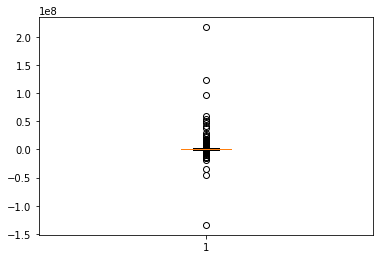

In [20]:
#df_train['ebit'] = sci.stats.mstats.winsorize(df_train['earn_from_op'], limits =[0.015, 0.015])
df_train['ebit'] = df_train['earn_from_op']
plt.boxplot(df_train.ebit)
plt.show()

2. Profit

0
count    6.680000e+02
mean     1.746451e+07
std      6.718432e+07
min      2.454000e+02
25%      5.988899e+05
50%      2.079737e+06
75%      1.023961e+07
max      9.353868e+08
Name: profit, dtype: float64
2.079737e+06    6
3.179544e+07    1
1.992372e+05    1
1.764491e+06    1
8.547527e+05    1
               ..
1.740950e+07    1
2.633705e+06    1
2.970949e+05    1
1.269732e+07    1
6.143953e+05    1
Name: profit, Length: 663, dtype: int64


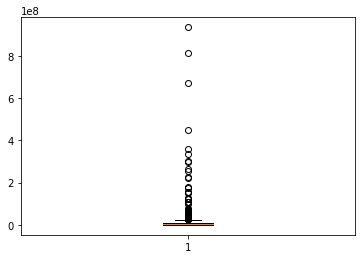

In [21]:
df_train['profit'] = df_train['gross_profit'].replace(np.nan, np.quantile(df_train['gross_profit'].dropna(),.5))
#df_train['profit'] = np.log(df_train['profit'])
print(df_train['profit'].isnull().sum())
print(df_train['profit'].describe())
print(df_train['profit'].value_counts())
plt.boxplot(df_train['profit']) 
plt.show()

3. Cash

0
count    6.680000e+02
mean     2.572136e+06
std      1.250278e+07
min      3.090000e+00
25%      2.031953e+04
50%      1.387784e+05
75%      9.784640e+05
max      2.562816e+08
Name: cash, dtype: float64
138778.38      32
154972.27       1
88932.47        1
6890565.23      1
3277843.17      1
               ..
6072.86         1
27710.98        1
14077.10        1
47322295.51     1
35.00           1
Name: cash, Length: 637, dtype: int64


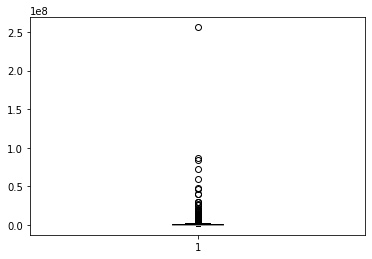

In [22]:
df_train['cash'] = df_train['cash'].replace(np.nan, np.quantile(df_train['cash'].dropna(),.5))
#df_train['cash'] = sci.stats.mstats.winsorize(df_train['cash'], limits =[0.0, 0.005]) #entweder winsorize oder log (log denke besser)
#df_train['cash'] = np.log(df_train['cash'])
print(df_train['cash'].isnull().sum())
print(df_train['cash'].describe())
print(df_train['cash'].value_counts())
plt.boxplot(df_train['cash']) 
plt.show()

## 2. Predict NaN for total equity
Source: https://towardsdatascience.com/predict-missing-values-in-the-dataset-897912a54b7b


Check for correlation to get relevant variables for regression

In [ ]:
print('corr total eqity x total result: ' + str(df_train['total_equity'].corr(df_train['total_result'])))
print('corr total eqity x total assets: ' + str(df_train['total_equity'].corr(df_train['total_assets'])))
print('corr total eqity x operating cash flow: ' + str(df_train['total_equity'].corr(df_train['cf_operating'])))


Split training and prediction dataset

In [23]:
cols = ['total_result', 'total_assets', 'cf_operating', 'total_equity']
df = df_train[cols]
test_df = df[df['total_equity'].isnull()]
df = df.dropna()

y_train = df['total_equity']
X_train = df.drop('total_equity', axis=1)
X_test = test_df.drop('total_equity', axis=1)

Train model to fit dataset and predict missing values from column total equity and replace them

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 804154.57039481  826770.37433689  750108.44000769 2034060.76386614
  906958.71620785  757800.98860179  694739.75133315  777633.44217635
 1031927.82907442  707250.99306169  798206.66922867  753555.95951813
  938481.58223852  838818.88678532  728338.08877872  658229.22939661
  757045.94589861 3707034.78681171  430054.79880165  809294.10299163]


Replace the missing values with predicted values

In [25]:
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = y_pred
print(df_train['total_equity'].isnull().sum())
print(df_train['total_equity'].describe())
print(df_train['total_equity'].value_counts()) #46 nulls

0
count    6.680000e+02
mean     2.257491e+07
std      1.437662e+08
min     -1.120000e-08
25%      9.821184e+04
50%      6.330711e+05
75%      4.242629e+06
max      2.883814e+09
Name: total_equity, dtype: float64
 0.000000e+00    21
 2.500000e+04     5
 3.640000e-12     5
 1.460000e-11     3
-3.640000e-12     3
                 ..
 2.154752e+07     1
 1.978479e+07     1
 3.494815e+05     1
 3.588707e+07     1
 8.313604e+06     1
Name: total_equity, Length: 631, dtype: int64


## 3. Financial ratios

We use two liquidity ratios (measure a companies ability to meet its short term dept obligations)

3.1. working capital ratio = current assets/current liabilities

0      5.142587
1      0.663710
2      3.328108
3      3.193566
4      0.102055
         ...   
664    0.835583
665    1.213142
666    0.041927
667    0.615002
668    1.006126
Name: wc_ratio, Length: 668, dtype: float64
count    668.000000
mean       2.468297
std        6.831628
min        0.000933
25%        0.785477
50%        1.177708
75%        1.929122
max       86.138329
Name: wc_ratio, dtype: float64


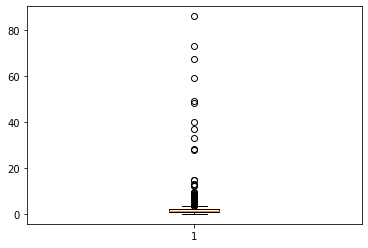

In [26]:
#create a column with total liabilities
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']

df_train['wc_ratio'] = df_train['current_assets']/df_train['total_liabilities_st']
print(df_train.wc_ratio)
print(df_train.wc_ratio.describe())
plt.boxplot(df_train.wc_ratio)
plt.show()

3.2. operating cash flow ratio = operating cf/current liabilities

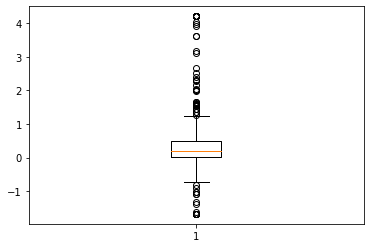

In [27]:
cf_pos = np.where(df_train['cf_operating'] > 1, df_train['cf_operating'], 0)
cf_neg = np.where(df_train['cf_operating'] < -1, df_train['cf_operating'], 0)
ocf = df_train['cf_operating']/df_train['total_liabilities_st']
# winsorize ocf
df_train['ocf_ratio'] = sci.stats.mstats.winsorize(ocf, limits =[0.01, 0.015])
plt.boxplot(df_train.ocf_ratio)
plt.show()

Next we use two solvency ratio (measure a companies ability to meet its long term dept obligations) that we will weight as one to circumvent overfitting

3.3. equity ratio = tot equity/total assets

0      0.738567
1      0.389698
2      0.000937
3      0.592532
4      0.417496
         ...   
664    0.182336
665    0.341823
666    0.000000
667    0.000000
668    0.040729
Name: equity_ratio, Length: 668, dtype: float64
count    668.000000
mean       0.387833
std        0.579788
min        0.000000
25%        0.106484
50%        0.284663
75%        0.506833
max        9.221039
Name: equity_ratio, dtype: float64
0.000000    46
0.273447     1
0.666702     1
0.389698     1
0.427731     1
            ..
0.215929     1
0.281173     1
0.794892     1
0.026319     1
0.154369     1
Name: equity_ratio, Length: 623, dtype: int64


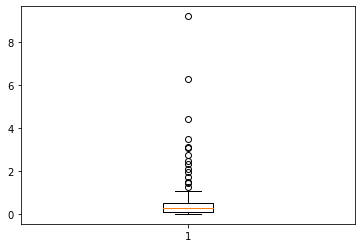

In [28]:
df_train['equity_ratio'] = np.where(df_train['total_equity'] > 1, df_train['total_equity']/df_train['total_assets'], 0)
print(df_train.equity_ratio)
print(df_train.equity_ratio.describe())
print(df_train.equity_ratio.value_counts()) #46 nulls
plt.boxplot(df_train.equity_ratio)
plt.show()

3.4. debt to equity ratio = total dept/total equity

count      668.000000
mean        44.738385
std        481.189680
min          0.000000
25%          0.591623
50%          1.908121
75%          5.358456
max      11312.751676
Name: debt_to_equity, dtype: float64
0        0.352444
1        1.560542
2      163.778649
3        0.236311
4        1.329259
          ...    
664      4.484386
665      1.925494
666      0.000000
667      0.000000
668     23.541597
Name: debt_to_equity, Length: 668, dtype: float64
0.000000      46
333.828843     1
3.946683       1
0.585548       1
1.448680       1
              ..
0.270086       1
4.970072       1
163.778649     1
2.417631       1
3.005200       1
Name: debt_to_equity, Length: 623, dtype: int64


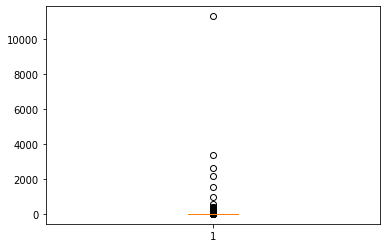

In [29]:
df_train['debt_to_equity'] = np.where(df_train['total_equity'] > 1, df_train['total_liabilities']/df_train['total_equity'], 0)
#df_train['debt_to_equity'] = sci.stats.mstats.winsorize(df_train['debt_to_equity'], limits =[0.0, 0.02])
print(df_train.debt_to_equity.describe())
print(df_train.debt_to_equity)
print(df_train.debt_to_equity.value_counts()) #46 nulls
plt.boxplot(df_train.debt_to_equity)
plt.show()

Create a dataframe with single ratios and financial ratios and a heatmap to check for correlation between ratios

           ebit        profit         cash   wc_ratio  ocf_ratio  \
0  6.536078e+06  3.859361e+07  10297047.50   5.142587   0.949635   
1  3.814091e+04  1.539841e+06    926383.75   0.663710  -0.617484   
2  8.979980e+04  1.500839e+07   9146283.79   3.328108   1.130863   
3  5.843150e+05  3.293227e+07   6890565.23   3.193566   0.665113   
4  5.403381e+07  1.254550e+08   5036615.09   0.102055   0.374604   
5  2.238291e+04  4.847705e+04     75679.79  14.987767   3.180455   
6  4.729300e+07  1.076359e+08  11542490.91   0.834046   0.394165   
7 -1.340470e+08  4.233500e+07  21696000.00   1.483001   2.055528   
8  3.785872e+06  6.110980e+06    322573.88   0.394765   0.023414   
9  1.704879e+05  3.147030e+05     35726.57   0.711538   0.278993   

   equity_ratio  debt_to_equity  
0      0.738567        0.352444  
1      0.389698        1.560542  
2      0.000937      163.778649  
3      0.592532        0.236311  
4      0.417496        1.329259  
5      0.933551        0.071179  
6      0.6486

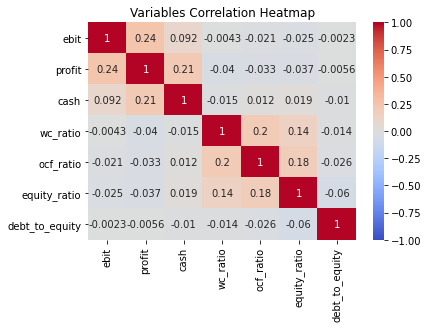

In [30]:
col = ['ebit', 'profit', 'cash', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity']
data = df_train[col]
print(data.head(10))
print(data.info())

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Variables Correlation Heatmap')
plt.show()

# Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset. Also we ran univariate logisitc regression to determine if the ratio is significant in a univariate sense (is not a K.O. criteria).

Our variables of interest are, so the variables we will put in our logistic regression, are :

- Working Capital Ratio
- Operating Cashflow Ratio
- Equity Ratio
- Debt to Equity Ratio
- Cash

In [31]:
df_train

id  default     legal_form  zip_code  sector  year_inc  count_emp  \
0    C_405        0  GmbH & Co. KG     12359   46730      1900        NaN   
1    C_292        0  GmbH & Co. KG     10719   70101      1976        NaN   
2    C_746        0           GmbH     13353   87100      1962      323.0   
3    C_838        0             AG     12529   68320      1972        1.0   
4    C_495        0    Einzelfirma     12165   47730      1908        NaN   
..     ...      ...            ...       ...     ...       ...        ...   
664  C_637        0           GmbH     82041   46410      1977        NaN   
665  C_091        0           GmbH     85716   70210      2000       64.0   
666  C_707        0           GmbH     85521   46693      2000        NaN   
667  C_323        0  GmbH & Co. KG     82031   68320      2007        NaN   
668  C_864        0  GmbH & Co. KG     85356   52291      1980       47.0   

    type_pl         sales  gross_performance  ...  age_num    age_quartile  \
0       GKV  1.068738e+08       1.068738e+08  ...    120.0  (65.0, 157.32]   
1       GKV  1.393869e+06       1.407889e+06  ...     44.0    (41.4, 65.0]   
2       GKV  3.864034e+06       7.597353e+05  ...     58.0    (41.4, 65.0]   
3       GKV  4.384786e+06       4.405058e+06  ...     48.0    (41.4, 65.0]   
4       GKV  1.104478e+08       1.104478e+08  ...    112.0  (65.0, 157.32]   
..      ...           ...                ...  ...      ...             ...   
664     GKV  2.804500e+07       2.804500e+07  ...     43.0    (41.4, 65.0]   
665     GKV  5.175343e+06       5.241814e+06  ...     20.0    (19.0, 22.0]   
666     GKV  4.307021e+07       4.307021e+07  ...     20.0    (19.0, 22.0]   
667     GKV  1.843728e+05       1.843728e+05  ...     13.0    (12.0, 15.0]   
668     GKV  2.204447e+07       2.204447e+07  ...     40.0    (31.0, 41.4]   

     age_cat         ebit        profit  total_liabilities  wc_ratio  \
0        >59   6536077.55  3.859361e+07       1.136445e+07  5.142587   
1      40-49     38140.91  1.539841e+06       7.034964e+06  0.663710   
2      50-59     89799.80  1.500839e+07       8.457608e+06  3.328108   
3      40-49    584315.02  3.293227e+07       2.793219e+06  3.193566   
4        >59  54033808.08  1.254550e+08       6.044734e+08  0.102055   
..       ...          ...           ...                ...       ...   
664    40-49    374000.00  1.420400e+07       1.292400e+07  0.835583   
665    20-29    244694.05  2.312606e+06       9.117692e+05  1.213142   
666    20-29  12876951.53  4.307021e+07       3.628583e+08  0.041927   
667    10-19      9855.87  1.934094e+05       1.146466e+05  0.615002   
668    40-49   1011020.73  5.700096e+06       7.297895e+06  1.006126   

     ocf_ratio  equity_ratio  debt_to_equity  
0     0.949635      0.738567        0.352444  
1    -0.617484      0.389698        1.560542  
2     1.130863      0.000937      163.778649  
3     0.665113      0.592532        0.236311  
4     0.374604      0.417496        1.329259  
..         ...           ...             ...  
664   0.026441      0.182336        4.484386  
665  -0.475269      0.341823        1.925494  
666   0.009356      0.000000        0.000000  
667   0.220748      0.000000        0.000000  
668   0.298800      0.040729       23.541597  

[668 rows x 50 columns]

## Working Capital Ratio

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.017   
Dependent Variable: default          AIC:              290.8446
Date:               2020-12-31 15:57 BIC:              299.8532
No. Observations:   668              Log-Likelihood:   -143.42 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.028117
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     9.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   -2.4324    0.2585  -9.4113  0.0000  -2.9389  -1.9258
wc_ratio    -0.2527    0.1591  -1.5888  0.1121  -0.5645   0.0590



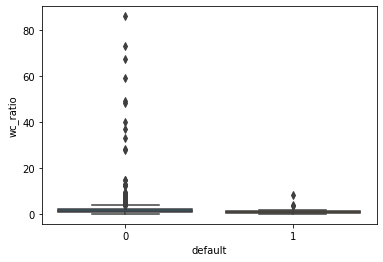

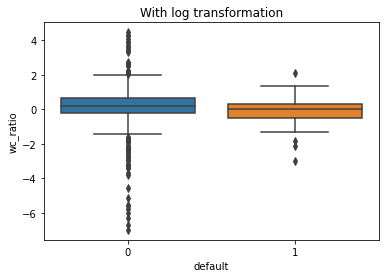

<Figure size 432x288 with 0 Axes>

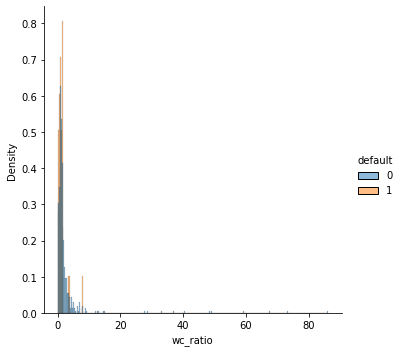

In [32]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ wc_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Operating Cash Flow Ratio

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.003   
Dependent Variable: default          AIC:              294.8796
Date:               2020-12-31 15:58 BIC:              303.8881
No. Observations:   668              Log-Likelihood:   -145.44 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.37534 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -2.7471    0.1779  -15.4442  0.0000  -3.0957  -2.3984
ocf_ratio  -0.2042    0.2428   -0.8409  0.4004  -0.6801   0.2717



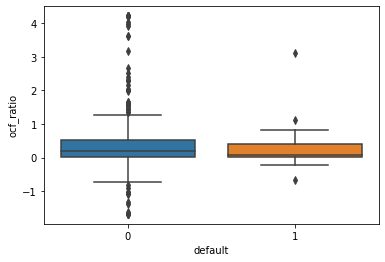

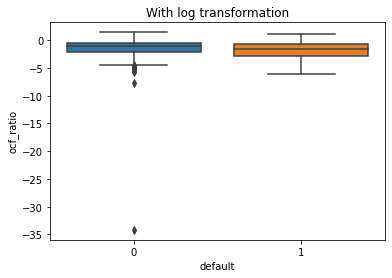

<Figure size 432x288 with 0 Axes>

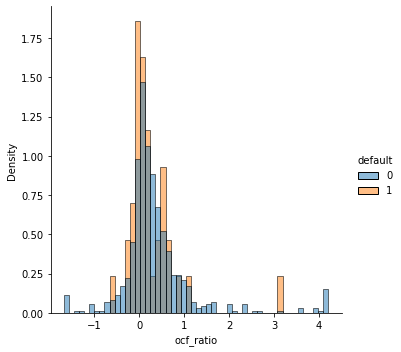

In [33]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ ocf_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Equity Ratio 

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.003   
Dependent Variable: default          AIC:              294.8737
Date:               2020-12-31 15:58 BIC:              303.8822
No. Observations:   668              Log-Likelihood:   -145.44 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.37355 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept      -2.8899   0.1898 -15.2284 0.0000 -3.2619 -2.5180
equity_ratio    0.1930   0.1927   1.0016 0.3165 -0.1847  0.5708



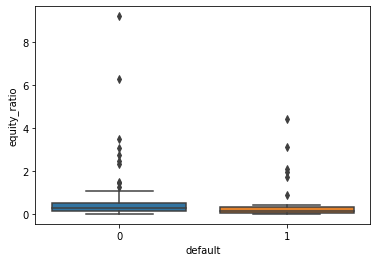

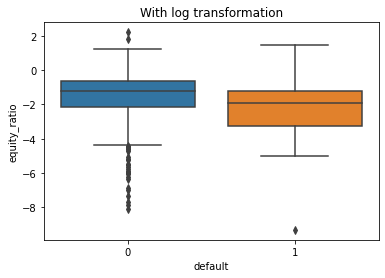

<Figure size 432x288 with 0 Axes>

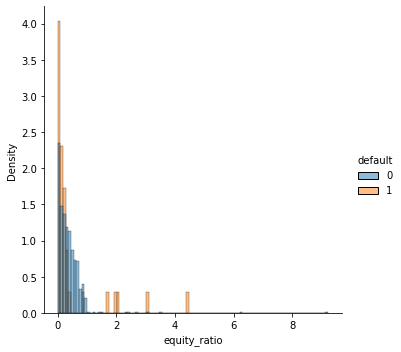

In [34]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ equity_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

In [35]:
pd.crosstab(df_train["default"],df_train["equity_ratio"]==0) #see that 6 defaulted with an equity ratio of 0

equity_ratio  False  True 
default                   
0               590     40
1                32      6

## Debt to Equity Ratio

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.016   
Dependent Variable: default          AIC:              291.1239
Date:               2020-12-31 15:58 BIC:              300.1324
No. Observations:   668              Log-Likelihood:   -143.56 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.033080
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept      -2.8459   0.1698 -16.7555 0.0000 -3.1788 -2.5130
debt_to_equity  0.0004   0.0002   1.7836 0.0745 -0.0000  0.0009



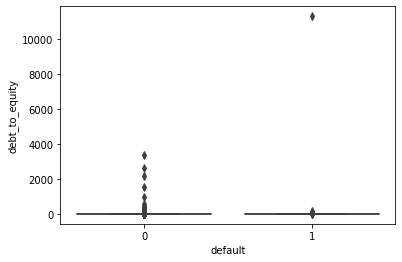

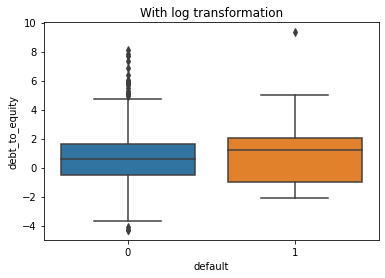

<Figure size 432x288 with 0 Axes>

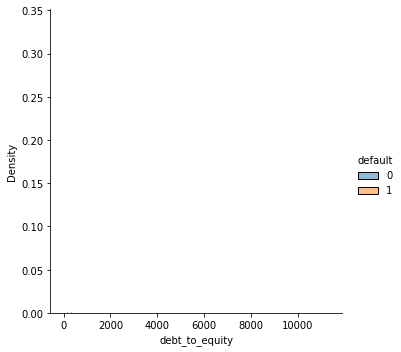

In [36]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="debt_to_equity",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ debt_to_equity + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Cash

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.055     
Dependent Variable: default          AIC:              279.5840  
Date:               2020-12-31 15:59 BIC:              288.5925  
No. Observations:   668              Log-Likelihood:   -137.79   
Df Model:           1                LL-Null:          -145.83   
Df Residuals:       666              LLR p-value:      6.0673e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -2.4195    0.1879  -12.8741  0.0000  -2.7878  -2.0511
cash         -0.0000    0.0000   -2.0794  0.0376  -0.0000  -0.0000



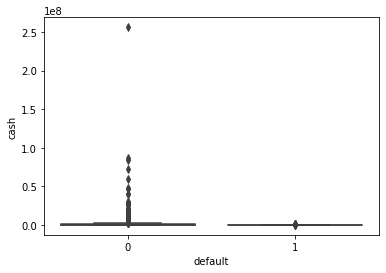

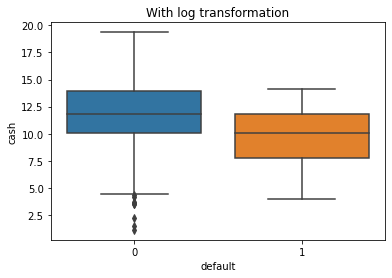

<Figure size 432x288 with 0 Axes>

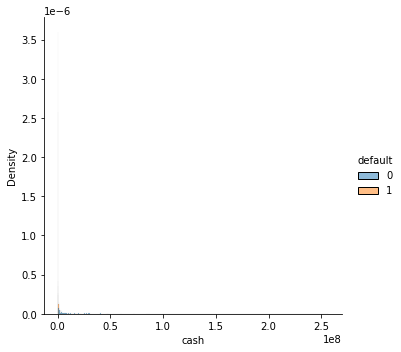

In [37]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="cash",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ cash + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

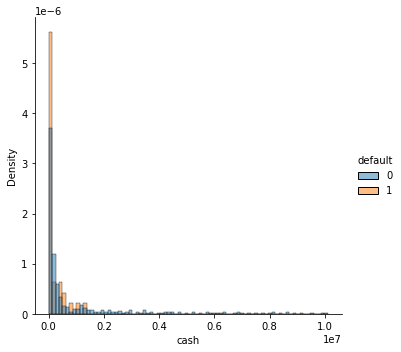

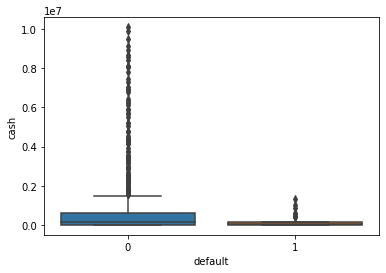

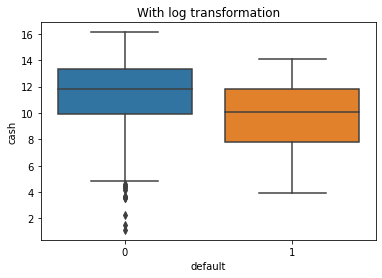

In [38]:
# See better histogram of cash
x = df_train[df_train["cash"] < df_train["cash"].quantile(0.95)]
sns.displot(x,x="cash",hue="default",stat="density",common_norm=False);
plt.figure()
sns.boxplot(y="cash",x="default",data=x);
plt.figure()
sns.boxplot(y=np.log(x["cash"]),x="default",
            data=x).set_title("With log transformation");


# Our Logit Regression

In [39]:
df_train


id  default     legal_form  zip_code  sector  year_inc  count_emp  \
0    C_405        0  GmbH & Co. KG     12359   46730      1900        NaN   
1    C_292        0  GmbH & Co. KG     10719   70101      1976        NaN   
2    C_746        0           GmbH     13353   87100      1962      323.0   
3    C_838        0             AG     12529   68320      1972        1.0   
4    C_495        0    Einzelfirma     12165   47730      1908        NaN   
..     ...      ...            ...       ...     ...       ...        ...   
664  C_637        0           GmbH     82041   46410      1977        NaN   
665  C_091        0           GmbH     85716   70210      2000       64.0   
666  C_707        0           GmbH     85521   46693      2000        NaN   
667  C_323        0  GmbH & Co. KG     82031   68320      2007        NaN   
668  C_864        0  GmbH & Co. KG     85356   52291      1980       47.0   

    type_pl         sales  gross_performance  ...  age_num    age_quartile  \
0       GKV  1.068738e+08       1.068738e+08  ...    120.0  (65.0, 157.32]   
1       GKV  1.393869e+06       1.407889e+06  ...     44.0    (41.4, 65.0]   
2       GKV  3.864034e+06       7.597353e+05  ...     58.0    (41.4, 65.0]   
3       GKV  4.384786e+06       4.405058e+06  ...     48.0    (41.4, 65.0]   
4       GKV  1.104478e+08       1.104478e+08  ...    112.0  (65.0, 157.32]   
..      ...           ...                ...  ...      ...             ...   
664     GKV  2.804500e+07       2.804500e+07  ...     43.0    (41.4, 65.0]   
665     GKV  5.175343e+06       5.241814e+06  ...     20.0    (19.0, 22.0]   
666     GKV  4.307021e+07       4.307021e+07  ...     20.0    (19.0, 22.0]   
667     GKV  1.843728e+05       1.843728e+05  ...     13.0    (12.0, 15.0]   
668     GKV  2.204447e+07       2.204447e+07  ...     40.0    (31.0, 41.4]   

     age_cat         ebit        profit  total_liabilities  wc_ratio  \
0        >59   6536077.55  3.859361e+07       1.136445e+07  5.142587   
1      40-49     38140.91  1.539841e+06       7.034964e+06  0.663710   
2      50-59     89799.80  1.500839e+07       8.457608e+06  3.328108   
3      40-49    584315.02  3.293227e+07       2.793219e+06  3.193566   
4        >59  54033808.08  1.254550e+08       6.044734e+08  0.102055   
..       ...          ...           ...                ...       ...   
664    40-49    374000.00  1.420400e+07       1.292400e+07  0.835583   
665    20-29    244694.05  2.312606e+06       9.117692e+05  1.213142   
666    20-29  12876951.53  4.307021e+07       3.628583e+08  0.041927   
667    10-19      9855.87  1.934094e+05       1.146466e+05  0.615002   
668    40-49   1011020.73  5.700096e+06       7.297895e+06  1.006126   

     ocf_ratio  equity_ratio  debt_to_equity  
0     0.949635      0.738567        0.352444  
1    -0.617484      0.389698        1.560542  
2     1.130863      0.000937      163.778649  
3     0.665113      0.592532        0.236311  
4     0.374604      0.417496        1.329259  
..         ...           ...             ...  
664   0.026441      0.182336        4.484386  
665  -0.475269      0.341823        1.925494  
666   0.009356      0.000000        0.000000  
667   0.220748      0.000000        0.000000  
668   0.298800      0.040729       23.541597  

[668 rows x 50 columns]

In [40]:
mdl1 = sm.Logit.from_formula('default ~ ebit + profit + cash + wc_ratio + ocf_ratio + equity_ratio + debt_to_equity + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.090     
Dependent Variable: default          AIC:              281.5351  
Date:               2020-12-31 15:59 BIC:              317.5694  
No. Observations:   668              Log-Likelihood:   -132.77   
Df Model:           7                LL-Null:          -145.83   
Df Residuals:       660              LLR p-value:      0.00047734
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -2.1910   0.2764 -7.9269 0.0000 -2.7328 -1.6493
ebit              -0.0000   0.0000 -0.2224 0.8240 -0.0000  0.0000
profit            -0.0000   0.0000 -0.4907 0.6237 -0.0000  0.0000
cash              -0.0000   0.0000 -

In [119]:
# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42)
 
# The splited Logit Model
mdl2split = sm.Logit(train_labels,train_features).fit()
mdl2split.summary2()

# Predict the test data
predictions_split = mdl2split.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions_split - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Optimization terminated successfully.
         Current function value: 0.190713
         Iterations 12
Mean Absolute Error: 0.11 .


Out sample: 
AUC (LY):   0.5833333333333334
GINI (LY):  0.16666666666666674


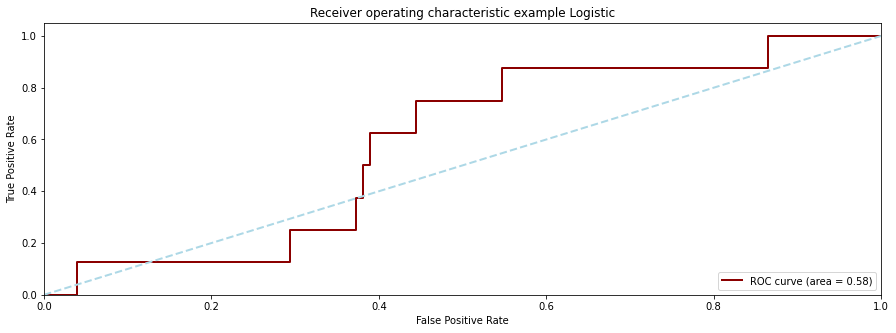

In [120]:
#AUC & Gini Graph + Calculations of splitted logit

fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
auc_split = metrics.auc(fpr_split, tpr_split)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_split, tpr_split, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_split)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("Out sample: ")
print('AUC (LY):  ',auc_split)
print('GINI (LY): ', 2*auc_split -1)

In [121]:
y = df_train["default"]
X = df_train[["ebit", "profit", "cash","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity"]]
X = X.fillna(0)
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

Optimization terminated successfully.
         Current function value: 0.198754
         Iterations 12


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.090     
Dependent Variable: default          AIC:              281.5351  
Date:               2020-12-31 16:49 BIC:              317.5694  
No. Observations:   668              Log-Likelihood:   -132.77   
Df Model:           7                LL-Null:          -145.83   
Df Residuals:       660              LLR p-value:      0.00047734
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -2.1910   0.2764 -7.9269 0.0000 -2.7328 -1.6493
ebit              -0.0000   0.0000 -0.2224 0.8240 -0.0000  0.0000
profit            -0.0000   0.0000 -0.4907 0.6237 -0.0000  0.0000
cash              -0.0000   0.0000 -1.8648 0.0622 -0.0000  0.0000
wc_ratio          -0.1846   0.1416 -1.3030 0.1926 -0.4622  0.0931
ocf_ratio         -0.1885   0.2918 -0.6460 0.5183 -0.7604  0.3834
equity_ratio       0.2179   0.1773  1.2289 0.2191 -0.1296  0.5653
debt_to_equity     0.0004   0.0002  1.6632 0.0963 -0.0001  0.0009
=================================================================

"""

In [122]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

default  estimated PD in %
566        1              87.60
285        0              36.29
648        0              21.92
139        1              20.78
80         0              16.77
..       ...                ...
432        0               0.00
410        0               0.00
394        0               0.00
376        0               0.00
335        0               0.00

[668 rows x 2 columns]

In sample: 
AUC L1:   0.7058479532163743
GINI L1:  0.41169590643274856
AUC L2:   0.7058479532163743
GINI L2:  0.41169590643274856
Out sample: 
AUC Test Sample:   0.5833333333333334
GINI Test Sample:  0.16666666666666674


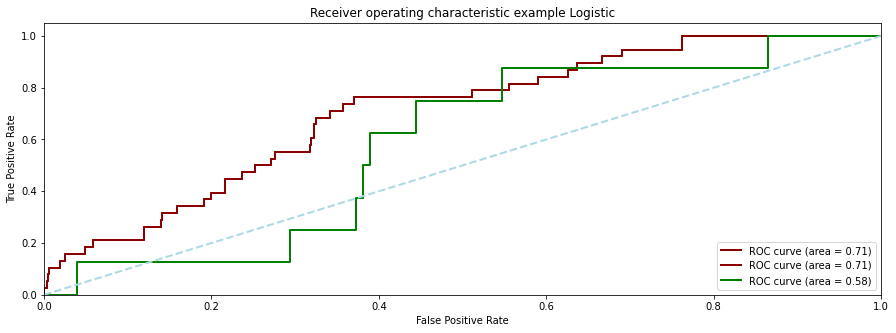

In [123]:
#AUC & Gini Graph + Calculations of old logit regression (red) splitted logit regression (green)
predictions_L1 = mdl1.predict(X)
predictions_L2 = mdl2.predict(X)
#AUC & Gini Graph + Calculations
fpr_L1, tpr_L1, thresholds_L1 = metrics.roc_curve(df_train['default'], predictions_L1)
auc_L1 = metrics.auc(fpr_L1, tpr_L1)

fpr_L2, tpr_L2, thresholds_L2 = metrics.roc_curve(df_train['default'], predictions_L2)
auc_L2 = metrics.auc(fpr_L2, tpr_L2)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_L1, tpr_L1, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_L1)
axes = plt.plot(fpr_L2, tpr_L2, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_L2)
axes = plt.plot(fpr_split, tpr_split, color='green',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_split)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("In sample: ")
print('AUC L1:  ',auc_L1)
print('GINI L1: ', 2*auc_L1 -1)
print('AUC L2:  ',auc_L2)
print('GINI L2: ', 2*auc_L2 -1)
print("Out sample: ")
print('AUC Test Sample:  ',auc_split)
print('GINI Test Sample: ', 2*auc_split -1)
# Totales overfitting wenn man alle Daten nimmt (trotzdem noch nicht gut RF hat AUC von 97 mit splitting). Bei Test Data eher schlechte Performance.

In [124]:
s[s["default"] == 1]

default  estimated PD in %
32         1               5.21
43         1               7.96
69         1               7.61
104        1              11.91
114        1               3.64
120        1               7.65
128        1               8.30
139        1              20.78
150        1              14.48
198        1               8.90
212        1               7.52
218        1               8.42
226        1               1.62
236        1               9.73
250        1               8.62
251        1              10.96
296        1               8.10
305        1               8.71
313        1              15.54
341        1               4.62
346        1               7.45
375        1               7.65
389        1               8.46
406        1               8.02
419        1               6.16
427        1               5.61
477        1               9.52
479        1               7.37
495        1               8.69
521        1               8.91
522        1               1.61
543        1               7.70
564        1               3.15
566        1              87.60
568        1               8.30
636        1               4.41
649        1               7.68
662        1               8.16

# PD Model preparation

## Dependent variabel: Good/Bad (default) definition

# PD model estimation

# PD model validation

## Out of sample validation (test)
### Evaluation of model performance: accuracy and area under the curve (AUC)
### Evalution of model performance: Gini